In [1]:
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'RAmodel2'
MODEL_TFLITE = MODELS_DIR + 'RAmodel2.tflite'


In [2]:
#Libraries to be used
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Data imported, books with a reading age greater than 16 removed and a new column added calculating the number of words per page.
# Some outliers found which led to capping number of words at 220. There are still some outliers which appear for lower reading ages though which appear to be pages for adults on how to read the story and engage the child. Short of going through row by row of raw data, hard to know how to resolve this.
address= "C:/Users/samos/OneDrive/Documents/Data Science/Introductory mini challenges/reading-age-prediction_data_ocr_data.csv"
dataset=pd.read_csv(address)
dataset.columns=["Excerpt","BookAndPage","Age"]



In [4]:
dataset["Words"]=dataset.Excerpt.apply(lambda x: set(text_to_word_sequence(x)))
dataset["NumberOfWords"]=dataset.Words.apply(lambda x: len(x))
dataset.head()

,Excerpt,BookAndPage,Age,Words,NumberOfWords
0,Tom and Ifra tug the big carrot.,,1.0,"{big, and, carrot, tug, tom, ifra, the}",7
1,"Tom, Ifra, Nick and Lin tug.",,1.0,"{lin, nick, and, tug, tom, ifra}",6
2,"Tom, Ifra, Nick, Lin and Sam tug.",,1.0,"{lin, nick, and, sam, tug, tom, ifra}",7
3,"Nick, Lin, Sam and Kit tug.",,1.0,"{lin, nick, and, sam, tug, kit}",6
4,Up pops the big carrot!,,1.0,"{the, pops, carrot, up, big}",5


In [5]:
dataset2=dataset[dataset["NumberOfWords"]<220]
New=dataset2[dataset2["Age"]<17]
New

,Excerpt,BookAndPage,Age,Words,NumberOfWords
0,Tom and Ifra tug the big carrot.,,1.0,"{big, and, carrot, tug, tom, ifra, the}",7
1,"Tom, Ifra, Nick and Lin tug.",,1.0,"{lin, nick, and, tug, tom, ifra}",6
2,"Tom, Ifra, Nick, Lin and Sam tug.",,1.0,"{lin, nick, and, sam, tug, tom, ifra}",7
3,"Nick, Lin, Sam and Kit tug.",,1.0,"{lin, nick, and, sam, tug, kit}",6
4,Up pops the big carrot!,,1.0,"{the, pops, carrot, up, big}",5
...,...,...,...,...,...
7565,In deep water In the deepest part of the sea t...,Dinosoar safari,9.0,"{long, neck, that, are, to, deep, —, bones, on...",52
7566,It is quite dark under the water so fish canno...,Dinosoar safari,9.0,"{long, have, snap, neck, tiny, are, to, not, d...",47
7567,In the air \ Flying is a great help to animals...,Dinosoar safari,9.0,"{a, fiying, to, safe, great, are, huge, their,...",34
7568,"There are moths, honeybees and other insects. ...",Dinosoar safari,9.0,"{insects, have, are, their, skin, made, wings,...",22


In [6]:
# A training and testing dataset created
X = New["NumberOfWords"]
y = New["Age"]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [7]:
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [8]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=64,
                    validation_data=(X_validation, Y_validation))

Epoch 1/500
83/83 [==============================] - 3s 27ms/step - loss: 18.2166 - mae: 3.3534 - val_loss: 16.2085 - val_mae: 2.9084
Epoch 2/500
83/83 [==============================] - 0s 3ms/step - loss: 13.8375 - mae: 2.7243 - val_loss: 15.7623 - val_mae: 2.6917
Epoch 3/500
83/83 [==============================] - 0s 3ms/step - loss: 13.1654 - mae: 2.6298 - val_loss: 14.7237 - val_mae: 2.6481
Epoch 4/500
83/83 [==============================] - 0s 3ms/step - loss: 11.8441 - mae: 2.4868 - val_loss: 13.8724 - val_mae: 2.5728
Epoch 5/500
83/83 [==============================] - 0s 3ms/step - loss: 11.9383 - mae: 2.4561 - val_loss: 13.0872 - val_mae: 2.4420
Epoch 6/500
83/83 [==============================] - 0s 3ms/step - loss: 11.6413 - mae: 2.3861 - val_loss: 11.9993 - val_mae: 2.3273
Epoch 7/500
83/83 [==============================] - 0s 3ms/step - loss: 11.0051 - mae: 2.2947 - val_loss: 10.5595 - val_mae: 2.2099
Epoch 8/500
83/83 [==============================] - 0s 3ms/step - l

83/83 [==============================] - 0s 2ms/step - loss: 5.2557 - mae: 1.7322 - val_loss: 5.6108 - val_mae: 1.7873
Epoch 64/500
83/83 [==============================] - 0s 2ms/step - loss: 5.3863 - mae: 1.7561 - val_loss: 5.8797 - val_mae: 1.8458
Epoch 65/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2436 - mae: 1.7221 - val_loss: 5.7323 - val_mae: 1.8260
Epoch 66/500
83/83 [==============================] - 0s 2ms/step - loss: 5.5045 - mae: 1.7439 - val_loss: 5.7427 - val_mae: 1.8273
Epoch 67/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2426 - mae: 1.7188 - val_loss: 5.6369 - val_mae: 1.7903
Epoch 68/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1327 - mae: 1.6992 - val_loss: 5.6113 - val_mae: 1.7786
Epoch 69/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0595 - mae: 1.6802 - val_loss: 5.6339 - val_mae: 1.8078
Epoch 70/500
83/83 [==============================] - 0s 2ms/step - loss: 4.9688 - mae: 1

Epoch 125/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0288 - mae: 1.6686 - val_loss: 5.5897 - val_mae: 1.7699
Epoch 126/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1047 - mae: 1.7011 - val_loss: 5.6742 - val_mae: 1.7754
Epoch 127/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0344 - mae: 1.6737 - val_loss: 5.5542 - val_mae: 1.7791
Epoch 128/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2042 - mae: 1.7068 - val_loss: 5.6434 - val_mae: 1.8052
Epoch 129/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0792 - mae: 1.6903 - val_loss: 5.5503 - val_mae: 1.7802
Epoch 130/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1630 - mae: 1.7103 - val_loss: 5.6617 - val_mae: 1.7692
Epoch 131/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1686 - mae: 1.6925 - val_loss: 5.6416 - val_mae: 1.8049
Epoch 132/500
83/83 [==============================] - 0s 2ms/step - 

83/83 [==============================] - 0s 2ms/step - loss: 4.9517 - mae: 1.6712 - val_loss: 5.7573 - val_mae: 1.8401
Epoch 187/500
83/83 [==============================] - 0s 2ms/step - loss: 5.3340 - mae: 1.7274 - val_loss: 5.6019 - val_mae: 1.7883
Epoch 188/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0419 - mae: 1.6912 - val_loss: 5.7577 - val_mae: 1.8521
Epoch 189/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1993 - mae: 1.7184 - val_loss: 5.5440 - val_mae: 1.7907
Epoch 190/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2614 - mae: 1.7275 - val_loss: 5.5712 - val_mae: 1.7669
Epoch 191/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2174 - mae: 1.7077 - val_loss: 5.5988 - val_mae: 1.7874
Epoch 192/500
83/83 [==============================] - 0s 2ms/step - loss: 5.4722 - mae: 1.7404 - val_loss: 5.5519 - val_mae: 1.7795
Epoch 193/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0948 -

Epoch 248/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0802 - mae: 1.6929 - val_loss: 5.5712 - val_mae: 1.7993
Epoch 249/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2081 - mae: 1.7233 - val_loss: 5.8464 - val_mae: 1.8629
Epoch 250/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0319 - mae: 1.6967 - val_loss: 5.5579 - val_mae: 1.7855
Epoch 251/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1405 - mae: 1.7046 - val_loss: 5.6260 - val_mae: 1.8132
Epoch 252/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0605 - mae: 1.6878 - val_loss: 5.7252 - val_mae: 1.8357
Epoch 253/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1410 - mae: 1.7036 - val_loss: 5.5540 - val_mae: 1.7950
Epoch 254/500
83/83 [==============================] - 0s 2ms/step - loss: 4.9936 - mae: 1.6816 - val_loss: 5.5704 - val_mae: 1.7912
Epoch 255/500
83/83 [==============================] - 0s 2ms/step - 

83/83 [==============================] - 0s 2ms/step - loss: 5.3833 - mae: 1.7221 - val_loss: 5.5986 - val_mae: 1.7908
Epoch 310/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1120 - mae: 1.6882 - val_loss: 5.5719 - val_mae: 1.7938
Epoch 311/500
83/83 [==============================] - 0s 2ms/step - loss: 5.3098 - mae: 1.7145 - val_loss: 5.5628 - val_mae: 1.7862
Epoch 312/500
83/83 [==============================] - 0s 2ms/step - loss: 5.4439 - mae: 1.7367 - val_loss: 5.5457 - val_mae: 1.7920
Epoch 313/500
83/83 [==============================] - 0s 3ms/step - loss: 5.2864 - mae: 1.7244 - val_loss: 5.5424 - val_mae: 1.7935
Epoch 314/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2958 - mae: 1.7347 - val_loss: 5.5453 - val_mae: 1.7832
Epoch 315/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0378 - mae: 1.6916 - val_loss: 5.7302 - val_mae: 1.7749
Epoch 316/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1922 -

Epoch 371/500
83/83 [==============================] - 0s 2ms/step - loss: 5.3045 - mae: 1.7208 - val_loss: 5.5562 - val_mae: 1.7910
Epoch 372/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1228 - mae: 1.6958 - val_loss: 5.6223 - val_mae: 1.8206
Epoch 373/500
83/83 [==============================] - 0s 2ms/step - loss: 5.3412 - mae: 1.7351 - val_loss: 5.6245 - val_mae: 1.8029
Epoch 374/500
83/83 [==============================] - 0s 2ms/step - loss: 5.4476 - mae: 1.7310 - val_loss: 5.5446 - val_mae: 1.7910
Epoch 375/500
83/83 [==============================] - 0s 3ms/step - loss: 5.4705 - mae: 1.7364 - val_loss: 5.6527 - val_mae: 1.8109
Epoch 376/500
83/83 [==============================] - 0s 2ms/step - loss: 4.9969 - mae: 1.6783 - val_loss: 5.5864 - val_mae: 1.7955
Epoch 377/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1968 - mae: 1.7157 - val_loss: 5.5380 - val_mae: 1.7857
Epoch 378/500
83/83 [==============================] - 0s 2ms/step - 

83/83 [==============================] - 0s 2ms/step - loss: 5.2033 - mae: 1.7273 - val_loss: 5.5638 - val_mae: 1.7913
Epoch 433/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1768 - mae: 1.7224 - val_loss: 5.5462 - val_mae: 1.7896
Epoch 434/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1473 - mae: 1.6985 - val_loss: 5.5481 - val_mae: 1.7800
Epoch 435/500
83/83 [==============================] - 0s 2ms/step - loss: 5.0883 - mae: 1.6882 - val_loss: 5.5468 - val_mae: 1.7789
Epoch 436/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1359 - mae: 1.7012 - val_loss: 5.5506 - val_mae: 1.7983
Epoch 437/500
83/83 [==============================] - 0s 2ms/step - loss: 5.5638 - mae: 1.7574 - val_loss: 5.5635 - val_mae: 1.7803
Epoch 438/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2330 - mae: 1.7086 - val_loss: 5.5501 - val_mae: 1.7791
Epoch 439/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2995 -

Epoch 494/500
83/83 [==============================] - 0s 3ms/step - loss: 5.4372 - mae: 1.7270 - val_loss: 5.5853 - val_mae: 1.7962
Epoch 495/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1993 - mae: 1.7031 - val_loss: 5.6884 - val_mae: 1.8184
Epoch 496/500
83/83 [==============================] - 0s 2ms/step - loss: 5.1120 - mae: 1.6975 - val_loss: 5.6175 - val_mae: 1.8267
Epoch 497/500
83/83 [==============================] - 0s 2ms/step - loss: 5.4268 - mae: 1.7428 - val_loss: 5.5463 - val_mae: 1.7935
Epoch 498/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2283 - mae: 1.7113 - val_loss: 5.7649 - val_mae: 1.8374
Epoch 499/500
83/83 [==============================] - 0s 2ms/step - loss: 4.9581 - mae: 1.6653 - val_loss: 5.6403 - val_mae: 1.8207
Epoch 500/500
83/83 [==============================] - 0s 2ms/step - loss: 5.2459 - mae: 1.7315 - val_loss: 5.5375 - val_mae: 1.7790


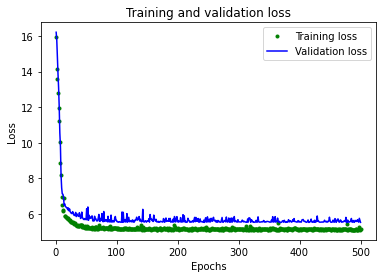

In [9]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

42/42 [==============================] - 0s 1ms/step - loss: 5.5375 - mae: 1.7790


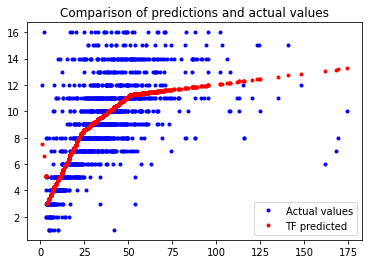

In [10]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(X_validation, Y_validation)

# Make predictions based on our test dataset
y_test_pred = model.predict(X_validation)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(X_validation, Y_validation, 'b.', label='Actual values')
plt.plot(X_validation, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

In [11]:
model.save(MODEL_TF)

INFO:tensorflow:Assets written to: models/RAmodel2\assets


In [12]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_to_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_to_tflite)


2780